# DS 7333 - Case Study 2 - Diabetes Prediction

Seemant Srivastava, Shravan Reddy, Duy Nguyen

### Introduction
In this study, we will build a classifier using logistic regression to predict hospital readmittance. There is missing data that must be imputed. We'll discuss variable importances for the target variable, which is hospital readmittance. There are total six sections in this case analysis:

1. Business Understanding  
2. Data Evaluation / Engineering  
3. Modeling Preparations  
4. Model Building & Evaluation  
5. Model Interpretability & Explainability  
6. Case Conclusions  

### Pep8 Compliant - Check using Flake8 in Jupyter Notebook

In [1]:
# importing libraries and reading in file
import warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics as mt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.compose import ColumnTransformer
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import RobustScaler

# Imbalanced Data
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# Pre-Processing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

### Business Understanding

According to the Healthcare Cost and Utilization Project (H-CUP) conducted by the Agency for Healthcare Research and Quality (AHRQ), the national benchmark 30-day all cause readmission rate for patients with diabetes is 19.8%.

**Objective:** The objective of this case study is to build a classifier using logistic regression to predict hospital readmittance, it will help identify the hospital readmission of patients with Diabetes within 30 days.

**Problem:** When patients are readmitted in the hospital within a short period, this can be very expensive to the individual household and our hospital system, as patients' wages can be lost and the medical bills can be signficant.

### Data Engineering

#### Load the data

In [2]:
# Load Data
df = pd.read_csv("diabetic_data.csv")
# Doing a sanity data check
print("\nThe dimensions before pre-processing for dataset file:", df.shape)
df.head()


The dimensions before pre-processing for dataset file: (101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [194]:
# Replace all the '?' values with  null (NaN or not a number) in all columns
# Filling '?' values with null (or NaN) values
df = df.replace('?', np.nan)
# Show the DataFrame
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### Look at column information

In [195]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [196]:
# Check for null values
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [197]:
# List the percentage of missing information
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

weight                      96.858479
medical_specialty           49.082208
payer_code                  39.557416
race                         2.233555
diag_3                       1.398306
diag_2                       0.351787
diag_1                       0.020636
encounter_id                 0.000000
tolazamide                   0.000000
glyburide                    0.000000
tolbutamide                  0.000000
pioglitazone                 0.000000
rosiglitazone                0.000000
acarbose                     0.000000
miglitol                     0.000000
troglitazone                 0.000000
citoglipton                  0.000000
examide                      0.000000
acetohexamide                0.000000
insulin                      0.000000
glyburide-metformin          0.000000
glipizide-metformin          0.000000
glimepiride-pioglitazone     0.000000
metformin-rosiglitazone      0.000000
metformin-pioglitazone       0.000000
change                       0.000000
diabetesMed 

In [198]:
# Seperate the data into categorical and numeric
df_num = df.columns[df.dtypes == 'int64']
df_cat = df.columns[df.dtypes == 'object']
print("Numeric Variables:", df_num)
print("Categorical Variables:", df_cat)

Numeric Variables: Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object')
Categorical Variables: Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object

### Histograms of numeric features
The output below shows histograms of the numeric features. Three of these features will be converted to factors or categorical variables since the values represent categories or groups, and not actual numeric values.

* Admission Type ID
* Discharge Disposition ID
* Admission Source ID

array([[<AxesSubplot: title={'center': 'encounter_id'}>,
        <AxesSubplot: title={'center': 'patient_nbr'}>,
        <AxesSubplot: title={'center': 'admission_type_id'}>,
        <AxesSubplot: title={'center': 'discharge_disposition_id'}>],
       [<AxesSubplot: title={'center': 'admission_source_id'}>,
        <AxesSubplot: title={'center': 'time_in_hospital'}>,
        <AxesSubplot: title={'center': 'num_lab_procedures'}>,
        <AxesSubplot: title={'center': 'num_procedures'}>],
       [<AxesSubplot: title={'center': 'num_medications'}>,
        <AxesSubplot: title={'center': 'number_outpatient'}>,
        <AxesSubplot: title={'center': 'number_emergency'}>,
        <AxesSubplot: title={'center': 'number_inpatient'}>],
       [<AxesSubplot: title={'center': 'number_diagnoses'}>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

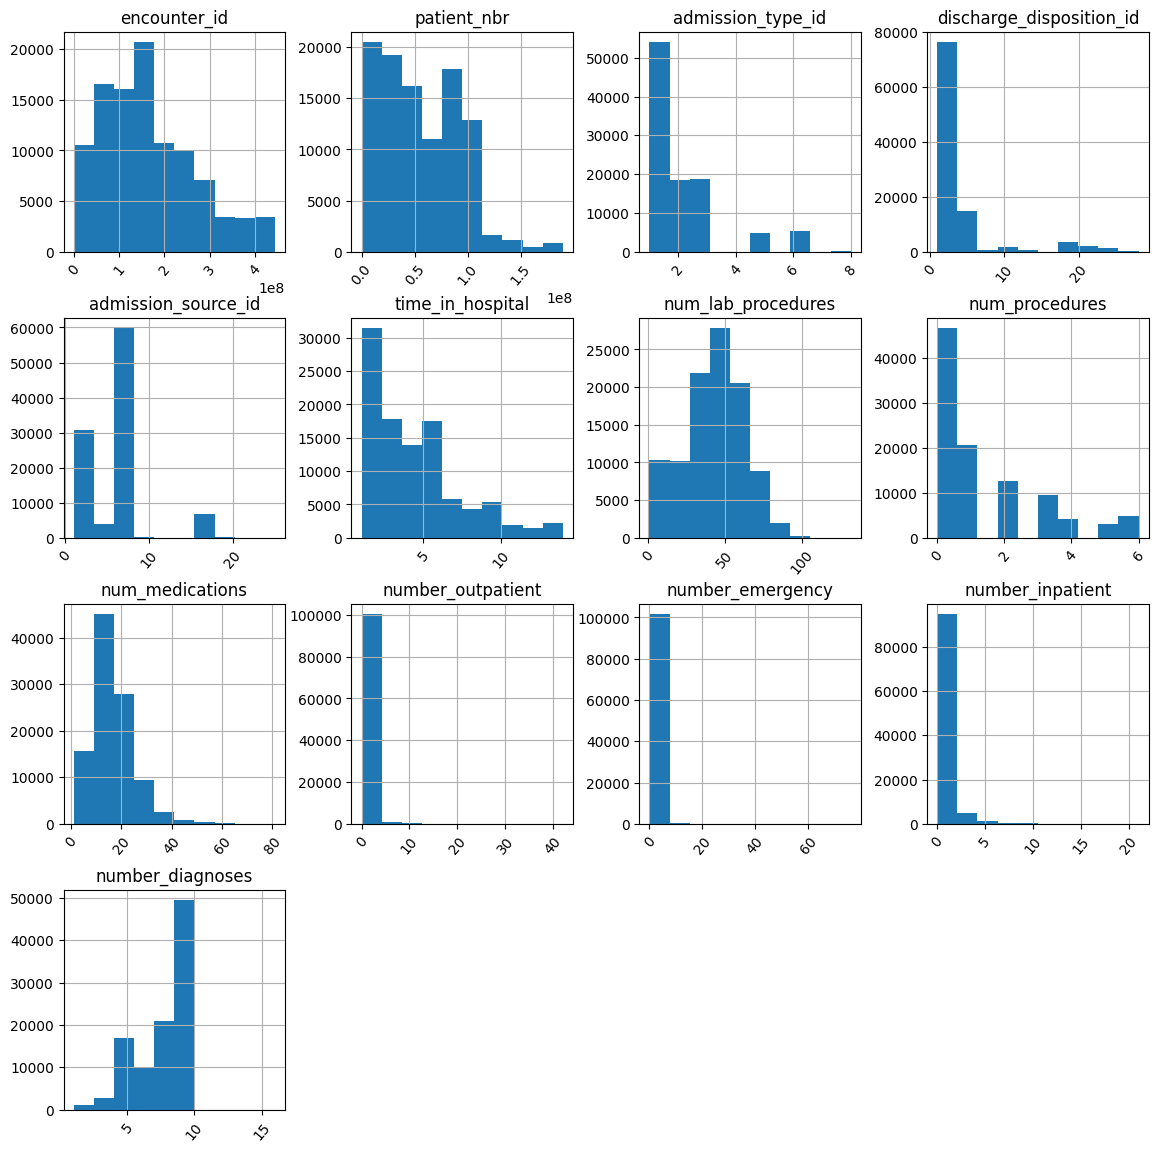

In [199]:
df.hist(figsize=(14,14), xrot=50)

### Final Feature Set

After evaluating the data above we decided to perform the following data preprocessing steps.

1- Remove Encounter ID, Patient NUBR (unique ids, not needed)

2- Race -> It is a categorical variable, therefore we will impute the missing valuees with the Mode, which is Caucasian.

3- Age -> Bin in 3 categories, young, middle and old

4- Weight -> Remove, too many unknowns, there is more than 85% of the data that is unknown.

5- Admission ID Type -> Merging values 5, 8 into 6 (see mapping spreadsheet). To put all the missing values in one place.

6- Admission Source -> Merging values 9, 15, 20, 21 into 17. To put all the missing values in one place.

7- Discharge disposition -> remove observations where the discharge disposition is related to hospice or death since these will not add to the possibility of being readmitted

8- DX -> Bing by using the ICD code in order to have the diagnosis of cardiovascular, respiratory, GI, Endocrinology, Diabetes, Neoplasis, Injury, Uninary and others

9- Remove Payor Code - not helpful, nearly 40% of the data is missing

10- Remove Medical speciality - not helpful, 49% of the data is missing

11- For the Categorical variables we will keep the none buckets, except examide and citoglipton since they only have one value

12- Numerical features, some are normally distrbuted. We will use RobustScaler. The data that look non normaly distributed are the discrete numerical data, therefore we decide no to log transform the data,

13- Readmitted -> Convert to binary as you will see in the code below.

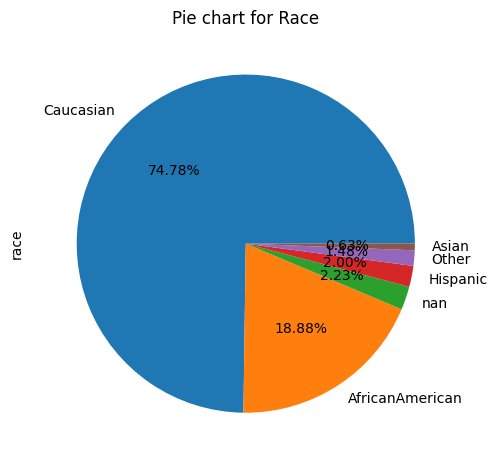

In [200]:
# Plot of Readmission
plt.figure(figsize=(12, 12))
plt.subplot(121)
df['race'].value_counts(dropna=False).plot.pie(autopct='%0.2f%%')
plt.title("Pie chart for Race")
plt.show()

### Drop Unnecessary Columns

First delete the columns that are id of the patients or encounter, so they are usefull for the model, and the columns of weight which is important but the amount of missing values is too much to make it an useful variable, there is 97% of missing values. We also delete the examide medication and citoglipton medication because these features have only one value in the dataset.

In [201]:
wgt = df["weight"].value_counts(normalize=True)*100
wgt

[75-100)     41.789177
[50-75)      28.057554
[100-125)    19.549578
[125-150)     4.535502
[25-50)       3.034094
[0-25)        1.501408
[150-175)     1.094776
[175-200)     0.344073
>200          0.093838
Name: weight, dtype: float64

In [202]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [203]:
df_reduced = df.drop(columns=['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 'examide', 'citoglipton'])
df_reduced.shape
df_reduced.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Categorize Diagnosis Codes into Clinical Groups

We decided to categorize the diagnosis codes into clinical groups, according to the following paper.

Reference: https://www.hindawi.com/journals/bmri/2014/781670/tab2/

In [204]:
# Function to Categorize DX based on URL ...
def bin_dx(code):
    try:
        code = float(code)
    except:
        code = 0

    # Circulatory
    if code in range(390, 460) or code == 785:
        return("Circulatory")

    # Respiratory
    elif code in range(460, 520) or code == 786:
        return("Respiratory")

    # Digestive
    elif code in range(520, 580) or code == 787:
        return("Digestive")

    # Diabetes
    elif code >= 250 and code < 251:
        return("Diabetes")

    # Injury
    elif code in range(800, 1000):
        return("Injury")

    # Musculoskeletal
    elif code in range(710, 740):
        return("Musculoskeletal")

    # Genitourinary
    elif code in range(580, 630) or code == 788:
        return("Genitourinary")

    # Neoplasms
    elif code in range(140, 240):
        return("Neoplasms")
    elif code in range(780, 783) or code == 784:
        return("Neoplasms")
    elif code in range(790, 800):
        return("Neoplasms")
    elif code in range(240, 250):
        return("Neoplasms")
    elif code in range(251, 280):
        return("Neoplasms")
    elif code in range(680, 710):
        return("Neoplasms")
    elif code in range(1, 140):
        return("Neoplasms")
    elif code in range(290, 320):
        return("Neoplasms")

    # Other
    else:
        return("Other")

In [205]:
df_reduced["diag_one"] = df_reduced["diag_1"].apply(bin_dx)
df_reduced["diag_two"] = df_reduced["diag_2"].apply(bin_dx)
df_reduced["diag_three"] = df_reduced["diag_3"].apply(bin_dx)


print(df_reduced["diag_one"].value_counts())
print("")
print(df_reduced["diag_two"].value_counts())
print("")
print(df_reduced["diag_three"].value_counts())

Circulatory        30437
Neoplasms          16318
Respiratory        14423
Digestive           9475
Diabetes            8757
Injury              6974
Other               5308
Genitourinary       5117
Musculoskeletal     4957
Name: diag_one, dtype: int64

Circulatory        31881
Neoplasms          21462
Diabetes           12794
Respiratory        10895
Genitourinary       8376
Other               7996
Digestive           4170
Injury              2428
Musculoskeletal     1764
Name: diag_two, dtype: int64

Circulatory        30306
Neoplasms          20985
Diabetes           17157
Other              11489
Respiratory         7358
Genitourinary       6680
Digestive           3930
Injury              1946
Musculoskeletal     1915
Name: diag_three, dtype: int64


In [206]:
df_reduced = df_reduced.drop(columns=['diag_1', 'diag_2', 'diag_3'])

### Categorize Age Attribute

Below we categorize the age attribute into 3 categories, young, middle and old.

In [207]:
print(df_reduced["age"].value_counts())
di = {'[70-80)': 'Old', '[60-70)': 'Old', '[80-90)': 'Old', '[90-100)': 'Old', '[50-60)': 'Midage', '[40-50)': 'Midage', '[30-40)': 'Young', '[20-30)': 'Young', '[10-20)': 'Young', '[0-10)': 'Young'}

print(df_reduced["age"].replace(di, inplace=True))
# print(df_reduced["age"].value_counts())

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
None


In [208]:
print(df_reduced["age"].value_counts())

Old       68541
Midage    26941
Young      6284
Name: age, dtype: int64


### Group features together for Admission Type and Admission Source

Some of the features or categories can be grouped together. For Admission Type we will place the following three values into the same group, since they sort of represent the same thing.

* 5 - Not Available
* 6 - Null
* 8 - Not Mapped

For Admission Source we will place the following five values into the same group:

* 9 - Not Available
* 15 - Not Available
* 17 - NULL
* 20 - Not Mapped
* 21 - Unknown/Invalid

In [209]:
# re-arrange the id columns can be useful in a way
# that all the missing values is place in one place and make it categorical
# admission_type_id
df_reduced.admission_type_id.replace(to_replace=5, value=6, inplace=True)
df_reduced.admission_type_id.replace(to_replace=8, value=6, inplace=True)
df_reduced.admission_type_id = df_reduced.admission_type_id.astype(str)

# admission_source_id
df_reduced.admission_source_id.replace(to_replace=9, value=17, inplace=True)
df_reduced.admission_source_id.replace(to_replace=15, value=17, inplace=True)
df_reduced.admission_source_id.replace(to_replace=20, value=17, inplace=True)
df_reduced.admission_source_id.replace(to_replace=21, value=17, inplace=True)
df_reduced.admission_source_id = df_reduced.admission_source_id.astype(str)

Next, we remove observations where the discharge disposition is related to hospice or death since these will not add to the possibility of being readmitted.

In [210]:
indexNames = df_reduced[df_reduced['discharge_disposition_id'].isin([11, 13, 14, 19, 20, 21])].index
df_reduced.drop(indexNames, inplace=True)

print(df_reduced['discharge_disposition_id'].value_counts())

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
5      1184
25      989
4       815
7       623
23      412
28      139
8       108
15       63
24       48
9        21
17       14
16       11
10        6
27        5
12        3
Name: discharge_disposition_id, dtype: int64


### Make the response variable a binary variable

The response has 3 values, but we will convert it to binary, if the patient is readmitted within 30 days, the value will be 1, otherwise it will be 0.

In [211]:
di = {'NO': 0, '>30': 0, '<30': 1}

df_reduced["readmitted"].replace(di, inplace=True)
print(df_reduced["readmitted"].value_counts())

0    88029
1    11314
Name: readmitted, dtype: int64


## EDA

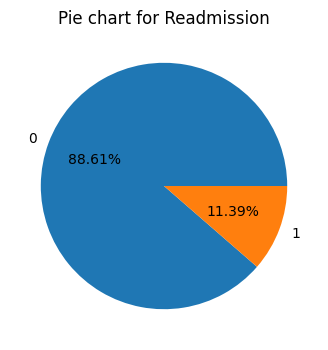

In [212]:
# Plot of Readmission
plt.figure(figsize=(12, 4))
plt.subplot(121)
df_reduced['readmitted'].value_counts(dropna=False).plot.pie(autopct='%0.2f%%')
plt.title("Pie chart for Readmission")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [213]:
df_reduced.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'diag_one', 'diag_two', 'diag_three'],
      dtype='object')

In [214]:
df_reduced.admission_type_id.unique()

array(['6', '1', '2', '3', '4', '7'], dtype=object)

In [215]:
di = {'1': 'Emergency', '2': 'Urgent',
      '3': 'Elective', '4': 'Newborn',
      '6': 'Not Available', '7': 'Trauma Center'}

df_reduced.admission_type_id.replace(di, inplace=True)
print(df_reduced.admission_type_id.unique())

['Not Available' 'Emergency' 'Urgent' 'Elective' 'Newborn' 'Trauma Center']


In [216]:
df_reduced.discharge_disposition_id.unique()

array([25,  1,  3,  6,  2,  5,  7, 10,  4, 18,  8, 12, 16, 17, 22, 23,  9,
       15, 24, 28, 27], dtype=int64)

In [227]:
di = {25: 'Not Available', 1: 'Home',
      3: 'SNF', 6: 'Home Health',
      2: 'Short Term Hospital', 5: 'Inpatient Care Institution',
      7: 'Left AMA', 10: 'Neonatal Aftercare',
      4: 'ICF', 18: 'Not Available',
      8: 'Home IV', 12: 'Still Patient',
      16: 'Another Institution', 17: 'This Institution',
      22: 'Rehab', 23: 'Long Term Hospital',
      9: 'Admitted', 15: 'Swing Bed',
      24: 'Nursing Facility Under Medicaid Not Medicare',
      28: 'Psychiatric Hospital', 27: 'Federal Health Care Facility'}

df_reduced.discharge_disposition_id.replace(di, inplace=True)
print(df_reduced.discharge_disposition_id.unique())

['Not Available' 'Home' 'SNF' 'Home Health' 'Short Term Hospital'
 'Inpatient Care Institution' 'Left AMA' 'Neonatal Aftercare' 'ICF'
 'Home IV' 'Still Patient' 'Another Institution' 'This Institution'
 'Rehab' 'Long Term Hospital' 'Admitted' 'Swing Bed'
 'Nursing Facility Under Medicaid Not Medicare' 'Psychiatric Hospital'
 'Federal Health Care Facility']


In [228]:
df_reduced.admission_source_id.unique()

array(['1', '7', '2', '4', '5', '17', '6', '3', '8', '14', '10', '22',
       '11', '25', '13'], dtype=object)

In [229]:
di = {'1': 'Physician Referral', '7': 'Emergency Room',
      '2': 'Clinic Referral', '4': 'Transfer from a hospital',
      '5': 'Transfer from a Skilled Nursing Facility (SNF)', '17': 'Not Available',
      '6': 'Transfer from another health care facility', '3': 'HMO Referral',
      '8': 'Court/Law Enforcement', '14': 'Extramural Birth',
      '10': 'Transfer from critial access hospital', '22': 'Transfer from hospital inpt/same fac reslt in a sep claim',
      '11': 'Normal Delivery', '25': 'Transfer from Ambulatory Surgery Center', '13': 'Sick Baby'}

df_reduced.admission_source_id.replace(di, inplace=True)
print(df_reduced.admission_source_id.unique())

['Physician Referral' 'Emergency Room' 'Clinic Referral'
 'Transfer from a hospital'
 'Transfer from a Skilled Nursing Facility (SNF)' 'Not Available'
 'Transfer from another health care facility' 'HMO Referral'
 'Court/Law Enforcement' 'Extramural Birth'
 'Transfer from critial access hospital'
 'Transfer from hospital inpt/same fac reslt in a sep claim'
 'Normal Delivery' 'Transfer from Ambulatory Surgery Center' 'Sick Baby']


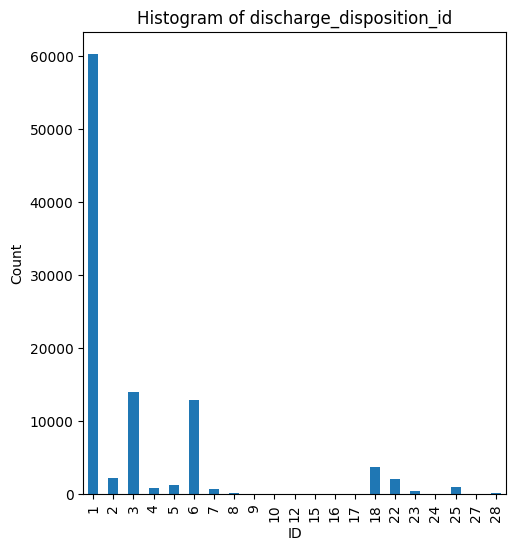

3:80: E501 line too long (95 > 79 characters)


In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
df_reduced['discharge_disposition_id'].value_counts(dropna=False).sort_index().plot(kind='bar')
plt.title("Histogram of discharge_disposition_id")
plt.xlabel("ID")
plt.ylabel("Count")
plt.show()

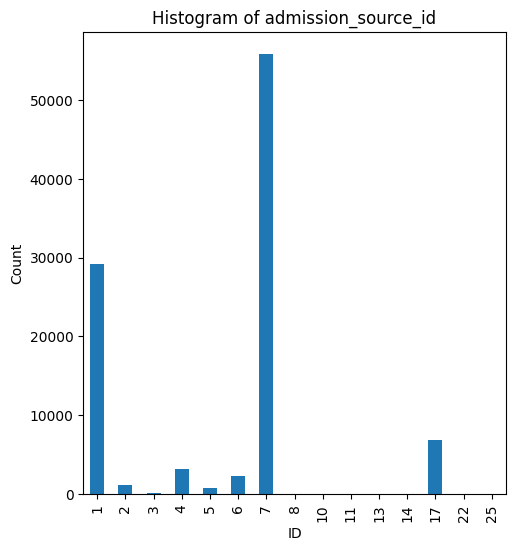

3:80: E501 line too long (104 > 79 characters)


In [142]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
df_reduced['admission_source_id'].astype('int').value_counts(dropna=False).sort_index().plot(kind='bar')
plt.title("Histogram of admission_source_id")
plt.xlabel("ID")
plt.ylabel("Count")
plt.show()

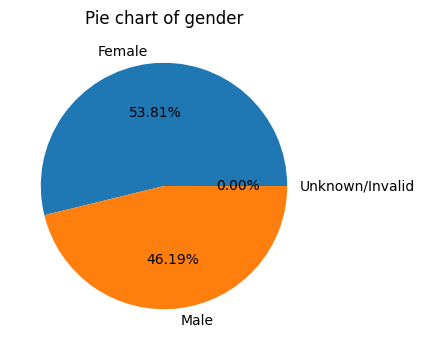

3:80: E501 line too long (88 > 79 characters)


In [154]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
df_reduced['gender'].value_counts(dropna=False).sort_index().plot.pie(autopct='%0.2f%%')
plt.title("Pie chart of gender")
plt.ylabel("")
plt.show()

In [133]:
df_reduced['metformin-rosiglitazone'].value_counts(dropna=False).sort_index()

No        99341
Steady        2
Name: metformin-rosiglitazone, dtype: int64

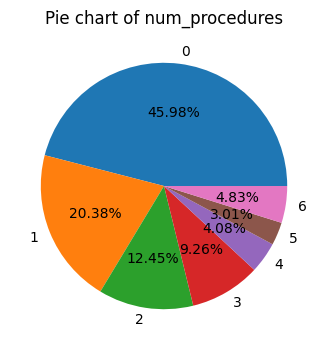

3:80: E501 line too long (96 > 79 characters)


In [157]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
df_reduced['num_procedures'].value_counts(dropna=False).sort_index().plot.pie(autopct='%0.2f%%')
plt.title("Pie chart of num_procedures")
plt.ylabel("")
plt.show()

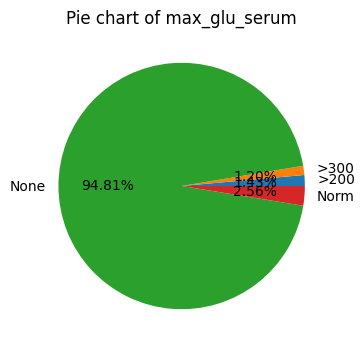

3:80: E501 line too long (95 > 79 characters)


In [156]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
df_reduced['max_glu_serum'].value_counts(dropna=False).sort_index().plot.pie(autopct='%0.2f%%')
plt.title("Pie chart of max_glu_serum")
plt.ylabel("")
plt.show()

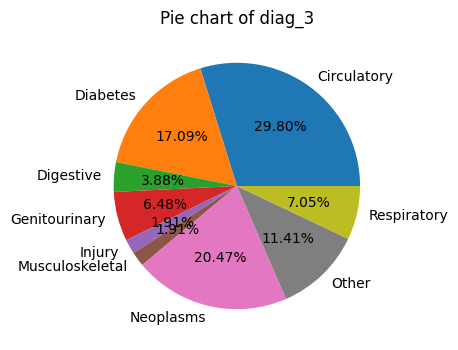

3:80: E501 line too long (92 > 79 characters)


In [155]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
df_reduced['diag_three'].value_counts(dropna=False).sort_index().plot.pie(autopct='%0.2f%%')
plt.title("Pie chart of diag_3")
plt.ylabel("")
plt.show()

In [150]:
df_reduced['miglitol'].value_counts(dropna=False).sort_index()

Down          5
No        99305
Steady       31
Up            2
Name: miglitol, dtype: int64

In [153]:
df_reduced['glipizide-metformin'].value_counts(dropna=False).sort_index()

No        99330
Steady       13
Name: glipizide-metformin, dtype: int64

### Model Preparation

We decided to use a grid search method to figure the best hyperparameter to choose and to select with lasso the most important variables or to suppress the less important variables with the ridge regularization method. We would use the regularization inside the grid. The models will be evaluated and selected according to the best performance base on the AUC metric. Also, we will scale the numeric variables with robust scaler, and one hot encode the categorical variables; furthermore, we will impute with mean the numerical variables, and impute with mode the categorical variables.

We will choose the AUC metric. The reason why we will use the AUC metric to select the model is because ROC curves are widely used to compare and evaluate different classification algorithms, and ROC curve is widely used when the dataset is imbalanced.

A Receiver Operating Characteristic curve or ROC curve is created by plotting the True Positive (TP) against the False Positive (FP) at various threshold settings. The ROC curve is generated by plotting the cumulative distribution function of the True Positive in the y-axis versus the cumulative distribution function of the False Positive on the x-axis. The area under the ROC curve (ROC AUC) is the single-valued metric used for evaluating the performance. The higher the AUC, the better the performance of the model at distinguishing between the classes. In general, an AUC of 0.5 suggests no discrimination, a value between 0.5–0.7 is acceptable and anything above 0.7 is good-to-go-model. However, medical diagnosis models, usually AUC of 0.95 or more is considered to be good-to-go-model. We did not use accuracy to evaluate the model because the data is very imbalance.

We also used smote due to data imbalance. SMOTE (Synthetic Minority Over-sampling Technique) comes in handy. You can use it to oversample the minority class. SMOTE is a type of data augmentation that synthesizes new samples from the existing ones. Furthermore, in order to deal with data inbalance we will perform stratified k fold cross validation.

We will use the precision and recall together with confusion matrix to evaluate the selected model. But in order to select the model we will use only the AUC. Precision is the fraction of the correctly classified instances from the total classified instances. Recall is the fraction of the correctly classified instances from the total true positive instances. The confusion matrix provides detailed results of the classification.

### Modeling & Building Evaluation

We'll use sklearn to build a logistic regression model. The first step we take is to define our numerical and categorical features. Then define X and y as usual.

In [24]:
categorical_features = ['race', 'gender', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide','chlorpropamide',
                        'glimepiride', 'acetohexamide', 'glipizide','glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 
                        'acarbose','miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
                        'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed',
                        'diag_one', 'diag_two','diag_three', 'age', 'admission_type_id', 'discharge_disposition_id','admission_source_id']

numeric_features = ['time_in_hospital', 'num_lab_procedures','num_procedures', 'num_medications', 'number_outpatient', 
                    'number_emergency', 'number_inpatient', 'number_diagnoses']

X = df_reduced[categorical_features + numeric_features]
y = df_reduced['readmitted']

# Verify shapes
print(df_reduced.shape)
print(X.shape)
print(y.shape)

1:80: E501 line too long (131 > 79 characters)
1:114: E231 missing whitespace after ','
2:68: E231 missing whitespace after ','
2:80: E501 line too long (128 > 79 characters)
2:129: W291 trailing whitespace
3:35: E231 missing whitespace after ','
3:80: E501 line too long (133 > 79 characters)
4:80: E501 line too long (129 > 79 characters)
5:47: E231 missing whitespace after ','
5:80: E501 line too long (138 > 79 characters)
5:116: E231 missing whitespace after ','
7:61: E231 missing whitespace after ','
7:80: E501 line too long (118 > 79 characters)
7:119: W291 trailing whitespace


(99343, 43)
(99343, 42)
(99343,)


### Logistic Regression Grid Search

Below we define a pipeline which includes the following steps:

Numeric Transformer - Imputes missing values with median and uses the RobustScaler to scale the data Categorical Transformer - Imputed missing values wiht most frequeent and One hot encodes categorical features

The two steps above make the Prepocessor stage of the pipeline. As mentioned earlier, we also include SMOTE in the pipeline to upsample the minority class.

Grid Search is setup cycle through different penalties for both L1 and L2. Note that we have to define different solvers in the grid search. Cross validation score is based on the AUC metric. We additionall use Stratified K-Fold cross validation to keep the classes in balance, although perhaps not needed since we do use SMOTE to blance the classes.

### SMOTE MODEL

In [88]:
# Ignore Warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=11)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy="median")),
    ('scaler', RobustScaler(with_centering=False))])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


pipeline=imbpipeline(steps=[['preprocessor', preprocessor],
                                ['smote', SMOTE(random_state=11)],
                                ['classifier', LogisticRegression(random_state=11,
                                                                  max_iter=1000, n_jobs=-1)]])

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

param_grid = [{'classifier__C': [0.001,
                                     0.002, 0.003, 0.004, 0.005,
                                     0.006, 0.007, 0.008, 0.009,
                                     0.01,
                                     0.02, 0.03, 0.04, 0.05,
                                     0.06, 0.07, 0.08, 0.09,
                                     0.1],
                   'classifier__penalty': ['l1'],  # switch to L2 if want
                   'classifier__solver': ['saga']}]

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

12:80: E501 line too long (80 > 79 characters)
21:9: E225 missing whitespace around operator
22:33: E127 continuation line over-indented for visual indent
23:80: E501 line too long (82 > 79 characters)
24:80: E501 line too long (94 > 79 characters)
27:40: E127 continuation line over-indented for visual indent
28:40: E127 continuation line over-indented for visual indent
31:38: E127 continuation line over-indented for visual indent
32:38: E127 continuation line over-indented for visual indent
33:38: E127 continuation line over-indented for visual indent
34:38: E127 continuation line over-indented for visual indent
35:38: E127 continuation line over-indented for visual indent
36:38: E127 continuation line over-indented for visual indent
37:20: E127 continuation line over-indented for visual indent


Cross-validation score: 0.6482882621086484
Test score: 0.6525155451313673


The above we see our best cross validation score is 0.64 and that the score on the test set was consistent.

The code below creates a second pipeline, but in which case we don't use SMOTE. We'll use this later to explore how it impacts which threshold to use if you want to optimize say Recall.

### Non-SMOTE Model

In [89]:
# Ignore Warnings
warnings.filterwarnings('ignore')

pipeline2 = imbpipeline(steps = [['preprocessor', preprocessor],
                                ['classifier', LogisticRegression(random_state=11,
                                                                  max_iter=1000, n_jobs=1)]])

param_grid = [{'classifier__C': [0.09,
                                     0.091, 0.092, 0.093, 0.094, 0.095,
                                     0.096, 0.097, 0.098, 0.099,
                                     0.1,
                                     0.11, 0.12, 0.13, 0.14, 0.15,
                                     0.16, 0.17, 0.18, 0.19,
                                     0.2],
                   'classifier__penalty': ['l1'],  # switch to L2 if want
                   'classifier__solver': ['saga']}]

grid_search_2 = GridSearchCV(estimator=pipeline2,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search_2.fit(X_train, y_train)
cv_score_2 = grid_search_2.best_score_
test_score_2 = grid_search_2.score(X_test, y_test)
print(f'Cross-validation score: {cv_score_2}\nTest score: {test_score_2}')

4:30: E251 unexpected spaces around keyword / parameter equals
4:32: E251 unexpected spaces around keyword / parameter equals
5:33: E128 continuation line under-indented for visual indent
5:80: E501 line too long (82 > 79 characters)
6:80: E501 line too long (93 > 79 characters)
9:38: E127 continuation line over-indented for visual indent
10:38: E127 continuation line over-indented for visual indent
11:38: E127 continuation line over-indented for visual indent
12:38: E127 continuation line over-indented for visual indent
13:38: E127 continuation line over-indented for visual indent
14:38: E127 continuation line over-indented for visual indent
15:20: E127 continuation line over-indented for visual indent
19:28: E128 continuation line under-indented for visual indent
20:28: E128 continuation line under-indented for visual indent
21:28: E128 continuation line under-indented for visual indent
22:28: E128 continuation line under-indented for visual indent


Cross-validation score: 0.6584757482561576
Test score: 0.6686020347480263


### Best Estimator

Below we output test scores for the different combinations of penalty and solver. What we find is that our L1 model performed best, but not signfiicantly.

In [90]:
results_LR = pd.DataFrame(grid_search.cv_results_['params'])
results_LR['test_score'] = grid_search.cv_results_['mean_test_score']
results_LR

,classifier__C,classifier__penalty,classifier__solver,test_score
0,0.001,l1,saga,0.644470
1,0.002,l1,saga,0.647207
2,0.003,l1,saga,0.648288
3,0.004,l1,saga,0.648251
4,0.005,l1,saga,0.647663
5,0.006,l1,saga,0.646995
6,0.007,l1,saga,0.646269
7,0.008,l1,saga,0.645661
8,0.009,l1,saga,0.645243
9,0.010,l1,saga,0.644899


In [91]:
print(grid_search.best_params_)

{'classifier__C': 0.003, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}


### Feature Importance

Below we use a cool library that allows use to output the weights of the features from our gridsearch object. We can use this to see which features are important in our model.

The code below outputs the top 10 features, the top 5. The top 5 features potentially show us those features that are most likely to increase the chance of readmission, while the Discharge Disposition 22 is the most signficant feature

The code below outputs the top 5 features that are most likely to increase the chance of readmission, along with the bottom 5 features that are most likely to decrease it. Dischange disposition 22 (Discharged/transferred to another rehab fac including rehab units of a hospital) is the most signficant feature to contribute to readmission. This corresponds to ischarged/transferred to another rehab fac including rehab units of a hospital. On the other hand, having Insulin of No along with being Discharged to Home (1) with some medications (pioglitzone and metformin) perhaps reduces the chance of readmission.

In [92]:
import eli5

onehot_columns = list(grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names(input_features=categorical_features))
numeric_features_list = list(numeric_features)
numeric_features_list.extend(onehot_columns)

print(eli5.format_as_dataframe(eli5.explain_weights(
    grid_search.best_estimator_.named_steps['classifier'], 
    top=23, feature_names=numeric_features_list)).head(10))

3:80: E501 line too long (182 > 79 characters)
8:59: W291 trailing whitespace


   target                      feature    weight
0       1  discharge_disposition_id_22  0.712823
1       1             number_inpatient  0.278896
2       1               A1Cresult_None  0.272498
3       1                      age_Old  0.151593
4       1         diag_one_Circulatory  0.143836
5       1             number_diagnoses  0.132607
6       1               race_Caucasian  0.106768
7       1           diag_two_Neoplasms  0.102778
8       1                 insulin_Down  0.081072
9       1         diag_two_Circulatory  0.077625


### Model Evaluation using precision and recall Plot

For a medical case study where we have a heavily imbalanced dataset with a goal to predict the miniority class, we would like to decrease false negatives at the expense of increasing false positives. In case of false negatives, let’s say we have a patient that is predicted to be not readmitted within 30 days, but the patient actually has to come back within 30 days, the patient now risk of missing important treatments within reasonable time window. Whereas in case of false positives, those patients predicted to be readmitted within 30 days but actually don’t have, was not done any harm to their body. This means we would like to have a very high recall and wiling to compromise on precision.

One way to improve the recall while maintaiing the precision for an imbalanced data is to use oversampling technique. As we see in the Precision-Recall plots below, there is a significant improvement in both precision and recall when we oversampled and tried balancing the data using SMOTE. The increased threshold also indicates that the classes are much more balanced. This means improving the classification rate of the minority class (patients who need to be readmitted within 30 days) and better identifying those who need proper treatments based on the prediction.

We, as data scientists, however, should be cautious when using the SMOTE method. When using a resampling method, we are showing the wrong proportions of the two classes to the classifier during the training. Several factors such as new breakthroughs in medical technology and changes in people’s diet can lead to changes in the unseen data coming from the future, especially in the proportions of the two prediction classes. The classifier can be learned on a regular basis to accommodate these changes so that it does not lose the information of the true class proportions when resampling.


### Model with SMOTE to address imbalance

(0.0, 1.0)

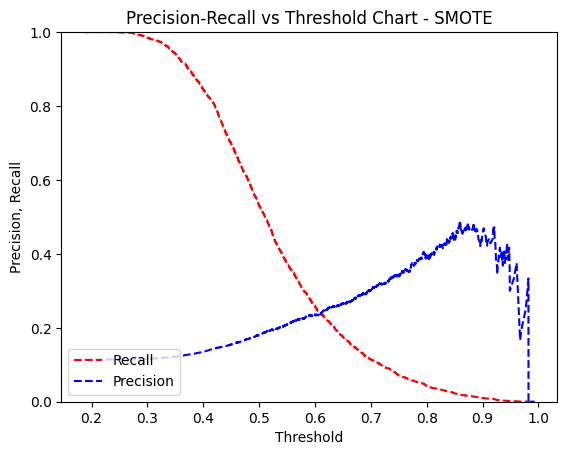

In [98]:
from sklearn.metrics import precision_recall_curve
probs_y = grid_search.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1])

plt.title("Precision-Recall vs Threshold Chart - SMOTE")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0, 1])

### Model with No SMOTE

(0.0, 1.0)

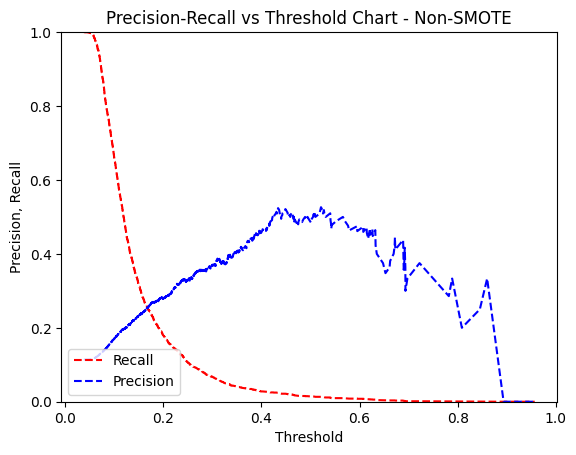

In [97]:
from sklearn.metrics import precision_recall_curve
probs_y_2 = grid_search_2.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probs_y_2[:, 1])

plt.title("Precision-Recall vs Threshold Chart - Non-SMOTE")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0, 1])

## Model Interpretability & Explainability

### Classification Report and Confusion Matrix

              precision    recall  f1-score   support

           0       0.92      0.62      0.74     17606
           1       0.17      0.60      0.27      2263

    accuracy                           0.62     19869
   macro avg       0.55      0.61      0.50     19869
weighted avg       0.84      0.62      0.69     19869



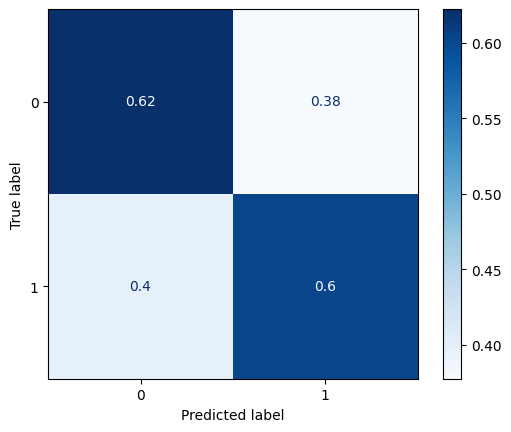

5:80: E501 line too long (87 > 79 characters)


In [208]:
from sklearn.metrics import classification_report
threshold = 0.48
y_pred = (grid_search.predict_proba(X_test)[:, 1] > threshold).astype('float')
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', normalize='true')

### Plot ROC

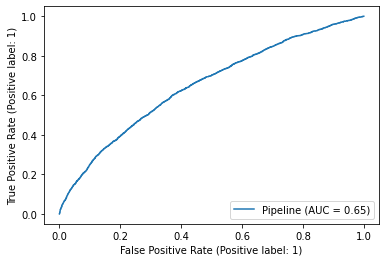

In [ ]:
mt.plot_roc_curve(grid_search.best_estimator_, X_test, y_test)

### Practical Application example

Adjusting the threshold to find the optimal false negatives and false positives depending on the business needs and resources is crucial. Here is a real world scenario where we can delve into the importance of adjusting the threshold.

**Q1. What if we had a business goal to ensure 95% of patients who are readmitted within 30 days are classifed as patients who are to be readmitted within 30 days?**

This means we want to have 95% recall. Now let's see what that means in terms of changes in threshold and precision. So both the threshold and the precision turns out to be relatively low when the recall is 0.95.

In [ ]:
readmit95_ind = np.argmin(recall >= 0.95)-1
readmit95_thresh = thresholds[readmit95_ind]
readmit95_precision = precision[readmit95_ind]
readmit95_recall = recall[readmit95_ind]

print("Threshold:", readmit95_thresh)
print("Precision:", readmit95_precision)
print("Recall:", readmit95_recall)

Threshold: 0.3155047469923971
Precision: 0.12107901109421637
Recall: 0.9500662836942112
Now we can tie these findings to the question of:

**Q2. How much resources (time and money) can the pathology department save utilizing this information?**

* We want to find out how much sampling is required to ensure certain precision and recall for this question.
* The key is to keep the threshold low to not miss any patients who have to be readmitted within 30days. In this case above, we have about 88%(1-precision) of patients we predict to be readmitted within 30 days actually get readmitted within 30 days.

**Q3. With this threshold, how much fraction of the sample did the model identify as not having to be readmitted within 30 days?**
* From the result below, there is roughly 65% of the data that are below the threshold and that means those 65% of the data doesn't need to be processed to be able to reach the business goal of ensuring 95% of patients who are admitted within 30 days are classified as patients who are to be readmitted within 30 days.

* So sparing 65% of the sampling work at the pathology department could save a lot of resources depending on the scale of the data. However, this means 5% of the patients who are diagnosed to not having to come back to the hospital within 30 days actually have to be readmitted within 30 days. This could be unacceptable in certain situations and patient's conditions. Thus here below we will keep improving the model by tuning the threshold.

In [ ]:
print("Proportion of samples below threshold:", np.mean(grid_search.best_estimator_.predict(X) < readmit95_thresh))

1:80: E501 line too long (115 > 79 characters)


### Tunning the threshold for classification

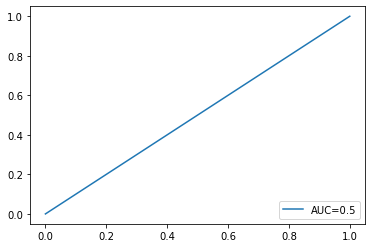

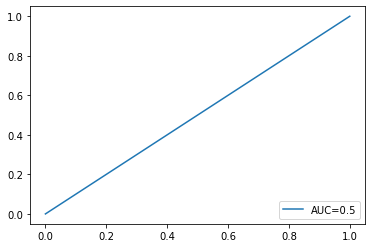

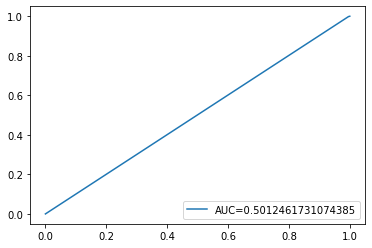

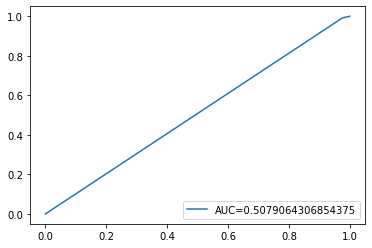

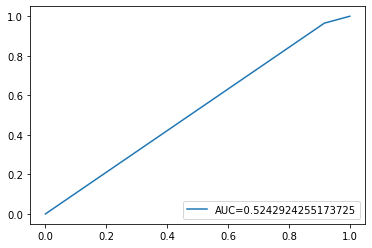

5:58: E225 missing whitespace around operator
8:80: E501 line too long (83 > 79 characters)
13:20: E231 missing whitespace after ','
13:27: E202 whitespace before ')'
15:7: E225 missing whitespace around operator
19:17: E231 missing whitespace after ','
19:21: E231 missing whitespace after ','


In [ ]:
pred_proba_df = pd.DataFrame(grid_search.predict_proba(X_test))
threshold_list = [0.01, 0.1, 0.2, 0.25, 0.3]
for i in threshold_list:
    print('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    accuracy = mt.accuracy_score(y_test, Y_test_pred.iloc[:, 1])
    print(accuracy)
    precision = mt.precision_score(y_test, Y_test_pred.iloc[:, 1], average='micro')
    print("Precision=", precision)
    recal = mt.recall_score(y_test, Y_test_pred.iloc[:, 1], average='micro')
    print("Recal=", recal)
    fscore = mt.f1_score(y_test, Y_test_pred.iloc[:, 1], average='weighted')
    print("fscore=",fscore )
    # Confusion matrix
    cm= confusion_matrix(y_test, Y_test_pred.iloc[:, 1])
    print("Confusion Matrix =", cm)
    fpr, tpr, _ = roc_curve(y_test, Y_test_pred.iloc[:, 1])
    auc = roc_auc_score(y_test, Y_test_pred.iloc[:, 1])
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.legend(loc=4)
    plt.show()

## Conclusion

**Summary:** Since our model is constrained to logistic regression, we recommend using the L1 model to reduce the complexity of the model since it performs almost identically to the L2 model (Ridge). 

Following features were of high importance for readmission. 
* discharge disposition
* current diagnosis
* previous inpatient stays

However, if we want to improve upon the accuracy of the model, we should consider using more advanced techniques such as neural networks to capture the non-linear relationships between the features.